# Lab 4

## import libs and connect to database

In [2]:
import pandas
import configparser
import psycopg2

In [3]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [4]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [5]:
cur=conn.cursor()

# q1

In [39]:
sql_q1 = """
            select * from gp20.student
            """

In [40]:
df= pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s2@jmu.edu,s2,IA
2,s3@jmu.edu,s3,IA
3,s4@jmu.edu,s4,IA
4,s5@jmu.edu,s5,IA
5,s6@jmu.edu,s6,IA
6,s7@jmu.edu,s7,IA
7,s8@jmu.edu,s8,IA
8,s9@jmu.edu,s9,IA
9,s10@jmu.edu,s10,IA


## q2

In [41]:
sql_q2 = """
        select gp20.professor.p_name,
        gp20.course.c_name
        from gp20.professor
        inner join gp20.course
        on gp20.professor.p_email = gp20.course.p_email
        
        """

In [42]:
df= pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Xuebin Wei,Data Mining
1,Noel Hendrickson,Counterfactual Reasoning
2,Kathleen Moore,Technology Applications in a Networked World
3,Stephen Marrin,Intro Private Sector
4,Timothy Walton,Hypothesis Testing


## q3

In [43]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp20.enroll_list
        group by c_number
        order by enrolled desc
        """

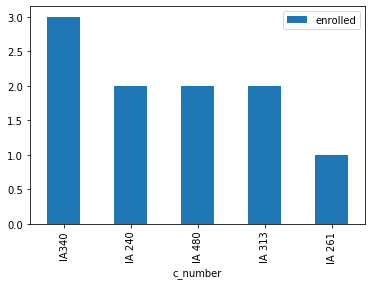

In [44]:
df= pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled',x='c_number')

## q4

In [45]:
sql_q4 = """
        select gp20.professor.p_name,
        count(gp20.course.c_name) as teaching_number
        from gp20.professor
        inner join gp20.course
        on gp20.professor.p_email = gp20.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

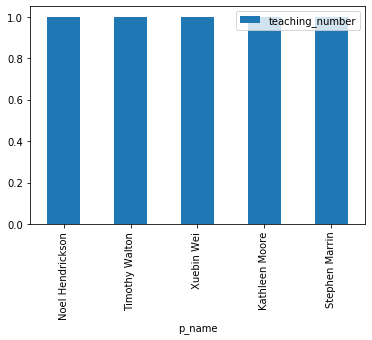

In [46]:
df= pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number',x='p_name')

## q5

In [50]:
sql_q5_professor = """
                    insert into gp20.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('ariel_d@jmu.edu','ariel_d','online')

In [ ]:
cur.execute(sql_q5_professor)

In [49]:
conn.commit()

In [31]:
df=pandas.read_sql_query('select * from gp20.professor',conn)
df[:]

,p_email,p_name,office
0,weixx@jmu.edu,Xuebin Wei,hhs112
1,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
2,moore8ka@jmu.edu,Kathleen Moore,ISAT 116
3,marrinsp@jmu.edu,Stephen Marrin,EnGeo 2104
4,waltontr@jmu.edu,Timothy Walton,ISAT 326
5,ariel_d@jmu.edu,ariel_d,online


## q6

In [51]:
sql_q6_course = """
                update gp20.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('ariel_d@jmu.edu','weixx@jmu.edu')

In [52]:
cur.execute(sql_q6_course)

In [53]:
#cur.execute('ROLLBACK')

In [54]:
conn.commit()

In [55]:
df=pandas.read_sql_query('select * from gp20.course',conn)
df[:]

,c_number,c_name,room,p_email
0,IA 313,Counterfactual Reasoning,online,hendrinx@jmu.edu
1,IA 240,Technology Applications in a Networked World,online,moore8ka@jmu.edu
2,IA 480,Intro Private Sector,online,marrinsp@jmu.edu
3,IA 261,Hypothesis Testing,online,waltontr@jmu.edu
4,IA340,Data Mining,online,ariel_d@jmu.edu


In [56]:
sql_q6_professor = """
                delete from gp20.professor
                where p_email = '{}'
                """.format('weixx@jmu.edu')

In [57]:
cur.execute(sql_q6_professor)

In [58]:
conn.commit()

In [59]:
df=pandas.read_sql_query('select * from gp20.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
1,moore8ka@jmu.edu,Kathleen Moore,ISAT 116
2,marrinsp@jmu.edu,Stephen Marrin,EnGeo 2104
3,waltontr@jmu.edu,Timothy Walton,ISAT 326
4,ariel_d@jmu.edu,ariel_d,online


## close connection

In [60]:
cur.close()
conn.close()